In [1]:
# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph

import re
import japanize_matplotlib
from matplotlib.animation import FuncAnimation, PillowWriter
import math

In [2]:
hard_sales = hs.load_hard_sales(normalize7=True)

In [3]:
p_sales = hs.pivot_sales(hard_sales)
p_sales = p_sales.resample('Y').sum()
p_sales

hw,3DS,DC,DS,GB,GBA,GC,N64,NS2,NSW,NeoGeoP,...,PSP,SATURN,Vita,WS,Wii,WiiU,XB360,XBOne,XSX,Xbox
report_date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,0.0,270095.0,0.0,1058864.0,0.0,0.0,395547.0,0.0,0.0,40638.0,...,0.0,5442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-12-31,0.0,968639.0,0.0,2606884.0,0.0,0.0,740509.0,0.0,0.0,141736.0,...,0.0,0.0,0.0,684517.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-12-31,0.0,397661.0,0.0,2077410.0,0.0,0.0,267741.0,0.0,0.0,117929.0,...,0.0,0.0,0.0,508263.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-12-31,0.0,287247.0,0.0,528362.0,4245686.0,929832.0,72550.0,0.0,0.0,14968.0,...,0.0,0.0,0.0,298348.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-12-31,0.0,4966.0,0.0,109226.0,3358439.0,1036405.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220300.0,0.0,0.0,0.0,0.0,0.0,329584.0
2003-12-31,0.0,0.0,0.0,8948.0,3591601.0,1012694.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,46366.0,0.0,0.0,0.0,0.0,0.0,95226.0
2004-12-31,0.0,0.0,1056428.0,0.0,2552922.0,617783.0,0.0,0.0,0.0,0.0,...,349283.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,34932.0
2005-12-31,0.0,0.0,3939096.0,0.0,1251834.0,304895.0,0.0,0.0,0.0,0.0,...,2194008.0,0.0,0.0,0.0,0.0,0.0,84490.0,0.0,0.0,12810.0
2006-12-31,0.0,0.0,8966021.0,0.0,451045.0,100796.0,0.0,0.0,0.0,0.0,...,1969363.0,0.0,0.0,0.0,989118.0,0.0,205977.0,0.0,0.0,0.0


In [4]:
data_2017 = p_sales.loc[str(2017)].iloc[0]
data_2017 = data_2017[data_2017 > 0 ]
data_2017

hw
3DS      1827131.0
NSW      3407158.0
PS4      1935247.0
Vita      396207.0
WiiU       21817.0
XBOne      14664.0
Name: 2017-12-31 00:00:00, dtype: float64

In [5]:
data_2017.index

Index(['3DS', 'NSW', 'PS4', 'Vita', 'WiiU', 'XBOne'], dtype='object', name='hw')

In [6]:
data_2017.name.year

2017

In [7]:
def plot_pie_chart_by_year(s:pd.Series):

    s_data = s[s > 0]
    plt.figure(figsize=(4, 4))
    plt.pie(s_data, labels=s_data.index, autopct='%1.1f%%')
    plt.title(f'Hard Share in {s_data.name.year}')
    plt.show()

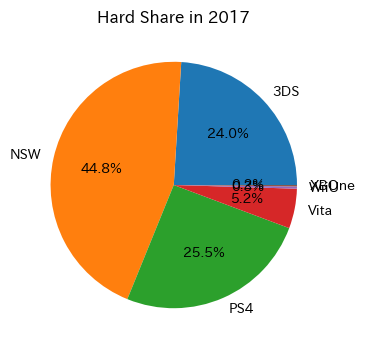

In [8]:
plot_pie_chart_by_year(data_2017)

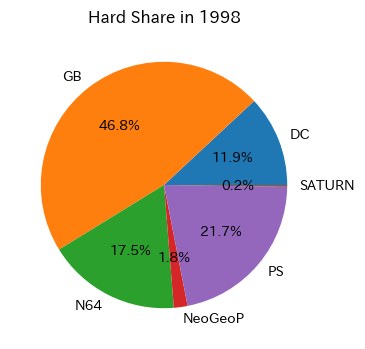

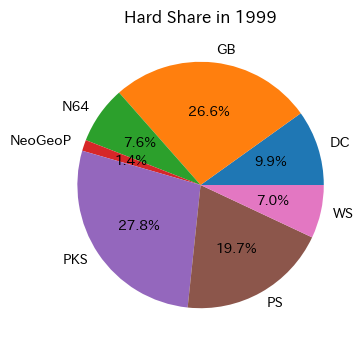

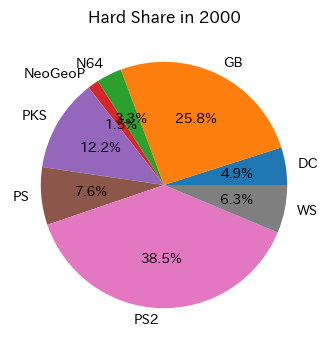

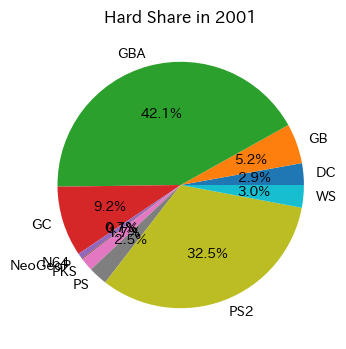

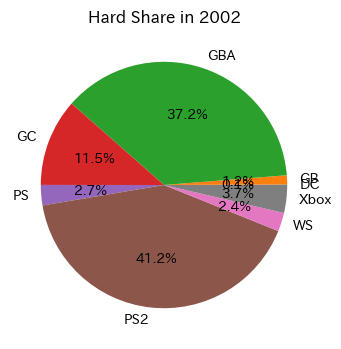

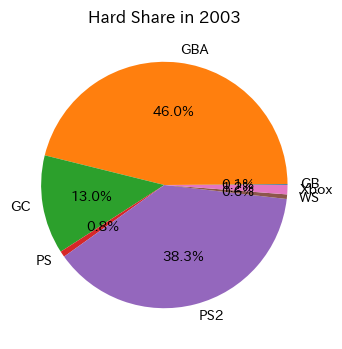

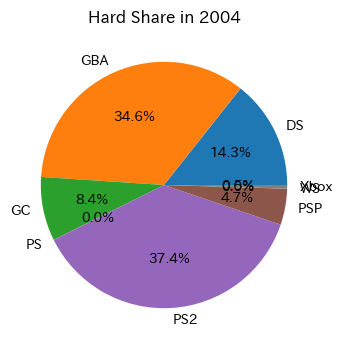

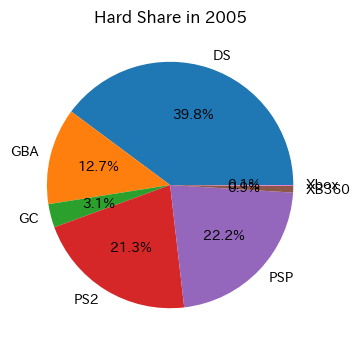

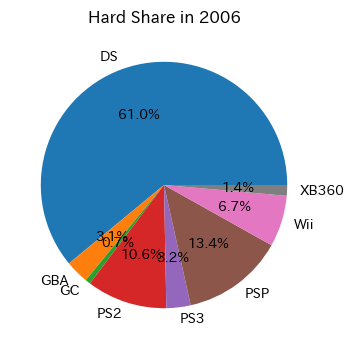

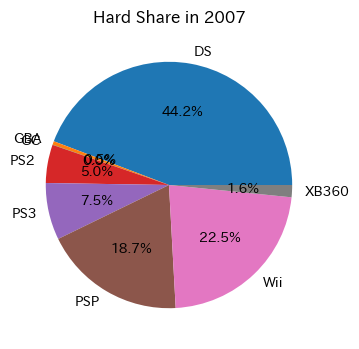

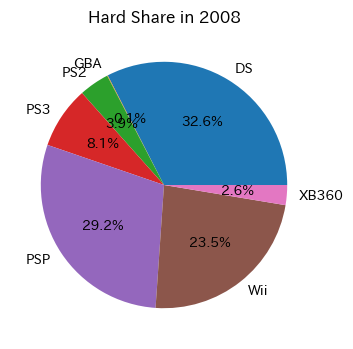

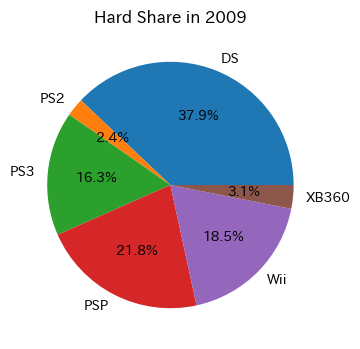

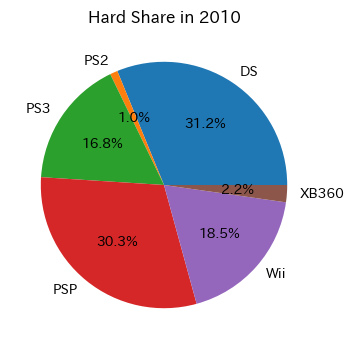

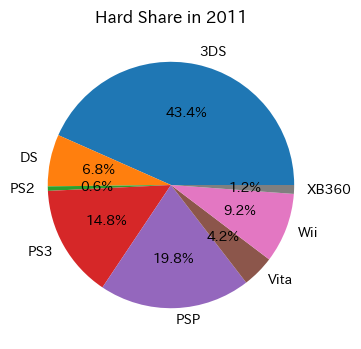

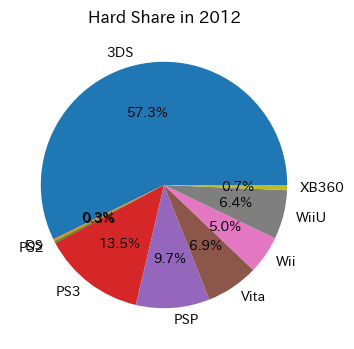

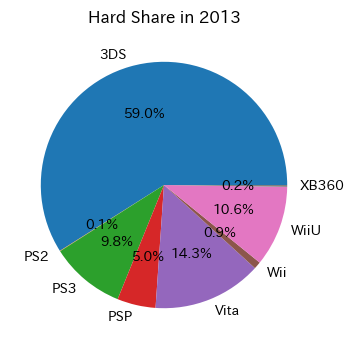

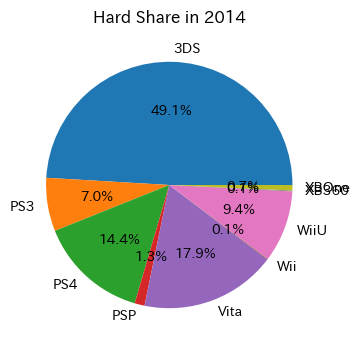

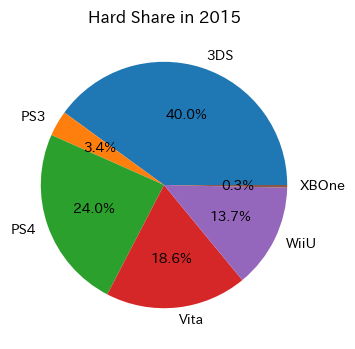

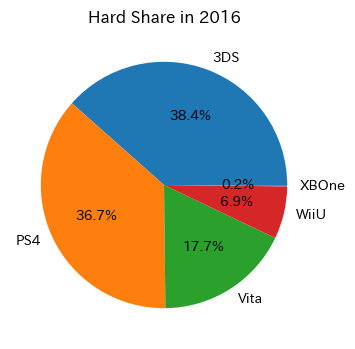

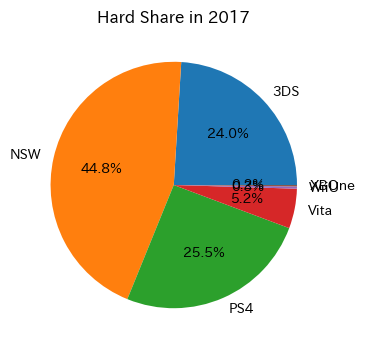

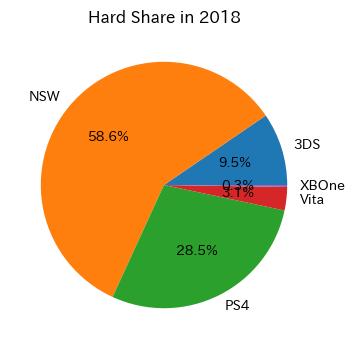

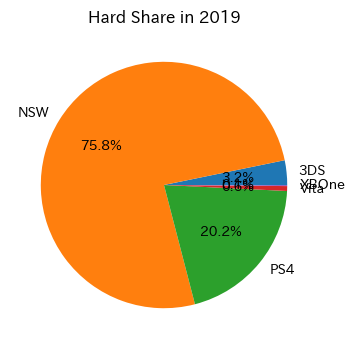

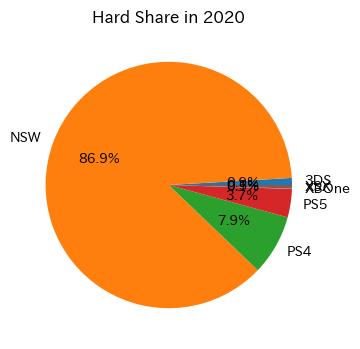

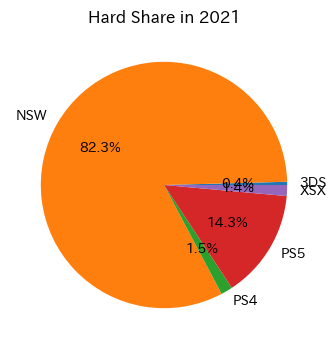

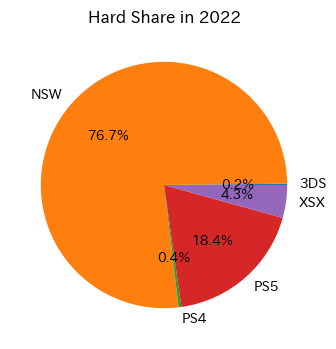

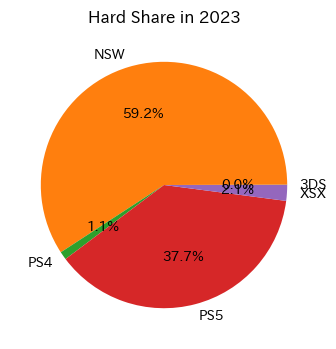

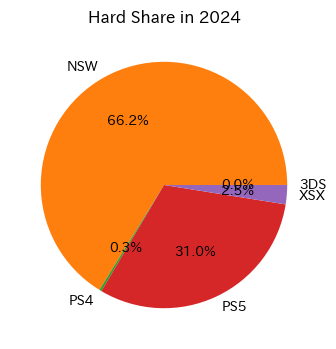

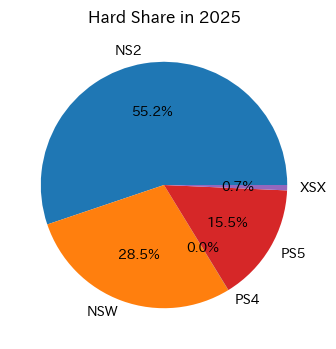

In [9]:
for idx, s in p_sales.iterrows():
    plot_pie_chart_by_year(s)

## 2016年から2022年までの各年のメーカー別シェアを表示    

In [19]:
maker_sales = hs.pivot_maker(hard_sales)
maker_sales_by_years = maker_sales.resample('Y').sum()
maker_sales_after_2016 = maker_sales_by_years.loc['2016':]
maker_sales_after_2016

# 全ての値が0の列を削除
maker_sales_after_2016 = maker_sales_after_2016.loc[:, (maker_sales_after_2016 != 0).any(axis=0)]
maker_sales_after_2016

maker_name,Microsoft,Nintendo,SONY
report_date,,,
2016-12-31,8897.0,2210608.0,2655885.0
2017-12-31,14664.0,5256106.0,2331454.0
2018-12-31,15339.0,4048808.0,1876955.0
2019-12-31,8315.0,4685076.0,1233821.0
2020-12-31,35009.0,6019704.0,797797.0
2021-12-31,97234.0,5607667.0,1072239.0
2022-12-31,269737.0,4815210.0,1176877.0
2023-12-31,141712.0,4065642.0,2660760.0
2024-12-31,118221.0,3109265.0,1467877.0


In [ ]:
def plot_pie_chart_by_maker_year(s:pd.Series) -> None:
    colors = {
        'Nintendo': 'red',
        'SONY': 'blue',
        'Microsoft': 'green'
    }

    s_data = s[s > 0]
    plt.figure(figsize=(4, 4))
    plt.pie(s_data, labels=s_data.index, autopct='%1.1f%%', 
            colors=[colors.get(label, 'gray') for label in s_data.index])
    plt.title(f'Maker Share in {s_data.name.year}')
    plt.show()

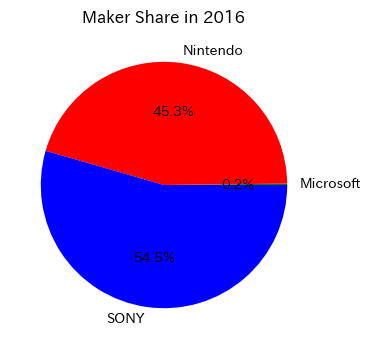

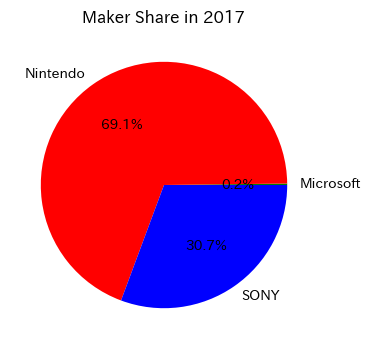

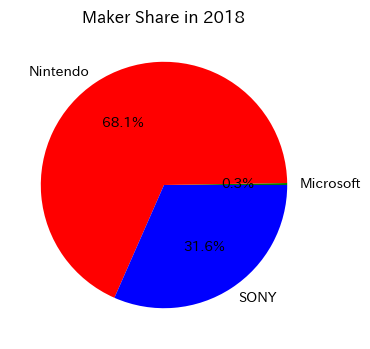

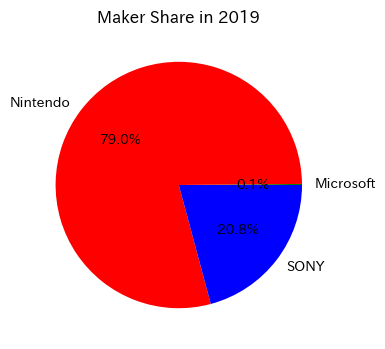

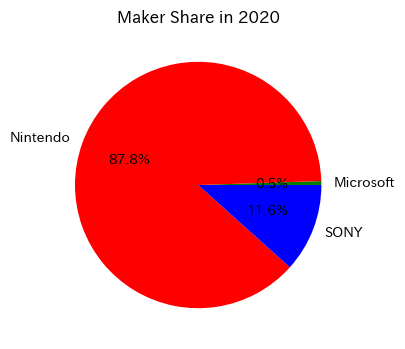

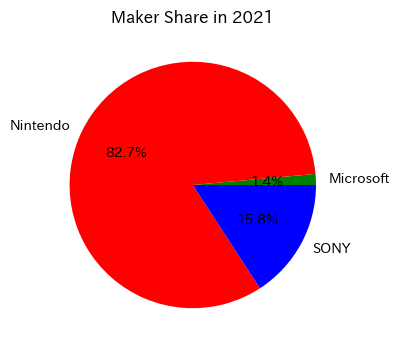

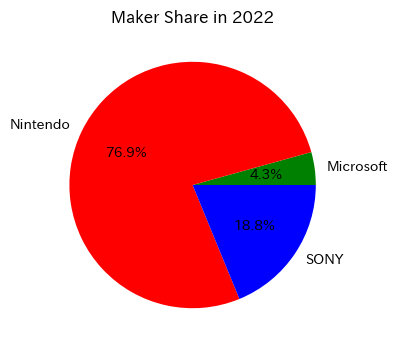

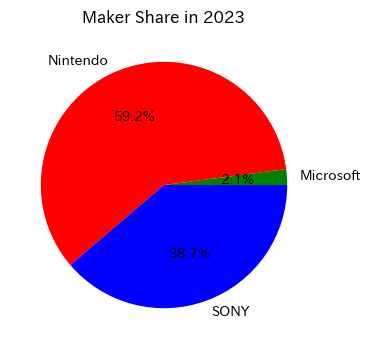

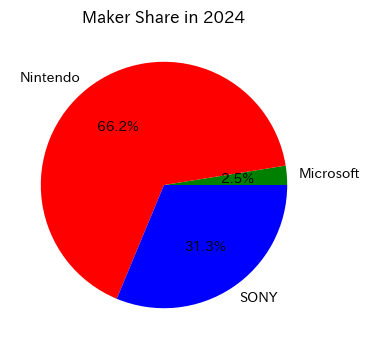

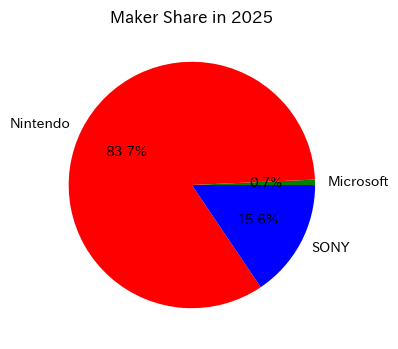

In [21]:
for idx, s in maker_sales_after_2016.iterrows():
    plot_pie_chart_by_maker_year(s)

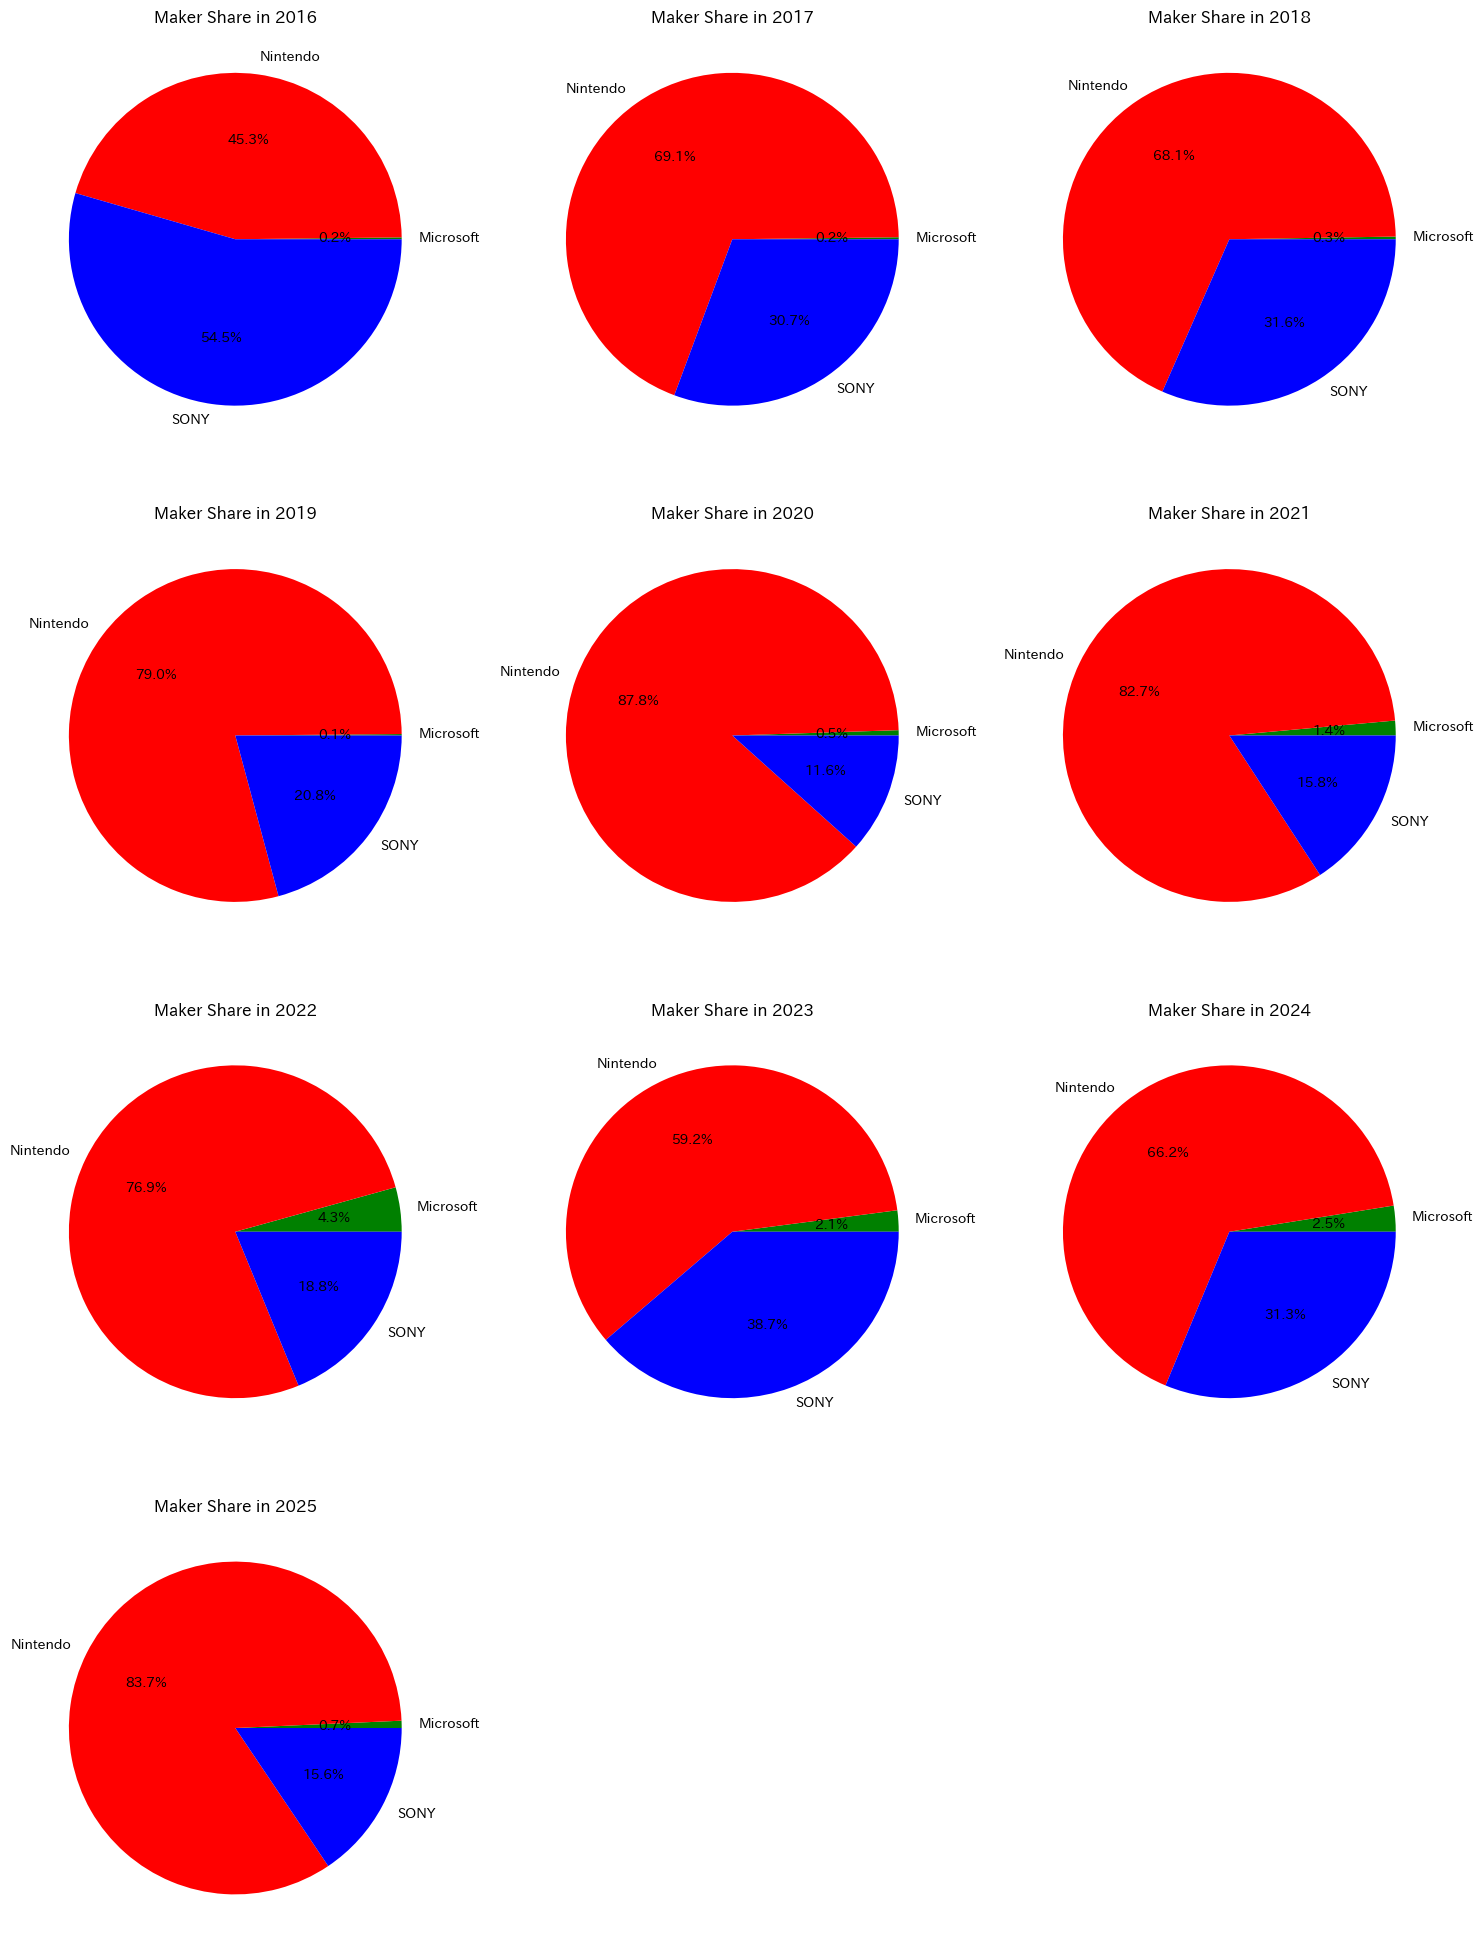

In [22]:
# maker_sales_after_2016の各年ごとに円グラフをサブプロットでまとめて表示
import math

years = maker_sales_after_2016.index.year
n_years = len(years)
n_cols = 3
n_rows = math.ceil(n_years / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()

colors = {
    'Nintendo': 'red',
    'SONY': 'blue',
    'Microsoft': 'green'
}

for i, (idx, s) in enumerate(maker_sales_after_2016.iterrows()):
    s_data = s[s > 0]
    color_list = [colors.get(label, 'gray') for label in s_data.index]
    axes[i].pie(s_data, labels=s_data.index, autopct='%1.1f%%', colors=color_list)
    axes[i].set_title(f'Maker Share in {idx.year}')

# 余分なサブプロットを非表示
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()